# Neural Network

さくらちゃん可愛すぎだろ……．
活性化関数の話とかが出ていてだいぶそれっぽくなってきた．

In [5]:
import numpy as np

### ステップ関数

In [10]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

In [7]:
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
y

array([False,  True,  True], dtype=bool)

In [8]:
y.astype(np.int)

array([0, 1, 1])

In [9]:
import matplotlib.pylab as plt

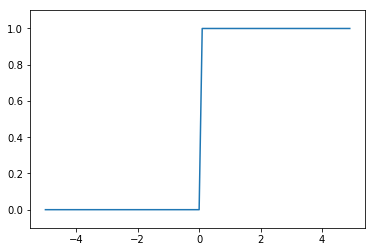

In [19]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## シグモイド関数

In [67]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [18]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

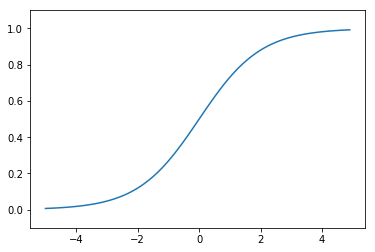

In [21]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

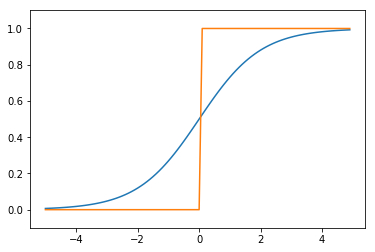

In [22]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
y1 = step_function(x)


plt.plot(x, y)
plt.plot(x, y1)
plt.ylim(-0.1, 1.1)
plt.show()

In [6]:
def relu(x):
    return np.maximum(x,0)

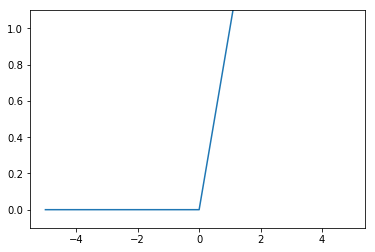

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [11]:
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [14]:
# 次元数の表示
np.ndim(A)

1

In [15]:
# 形状の把握（何行，何列）　←　tupleで帰ってくる
A.shape

(4,)

In [19]:
B = np.array([[1,2], [3,4], [5,6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [20]:
np.ndim(B)

2

In [21]:
B.shape

(3, 2)

### 行列演算

In [22]:
A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [24]:
B = np.array([[5,6], [7,8]])
B.shape

(2, 2)

In [26]:
# 行列同士の内積
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [31]:
# 別の形状の行列同士の内積も求められる（この表現どうなんだ
A = np.array([[1,2,3], [4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [32]:
A.shape

(2, 3)

In [36]:
B = np.array([[1,2], [3,4], [5,6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [37]:
B.shape

(3, 2)

In [38]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [40]:
A = np.array([[1,2], [3,4], [5,6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [41]:
A.shape

(3, 2)

In [44]:
B = np.array([7,8])
B

array([7, 8])

In [45]:
np.dot(A,B)

array([23, 53, 83])

In [46]:
np.dot(B,A)

ValueError: shapes (2,) and (3,2) not aligned: 2 (dim 0) != 3 (dim 0)

In [47]:
C = np.array([1,2,3])

In [48]:
np.dot(C, B)

ValueError: shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)

In [49]:
np.dot(B, C)

ValueError: shapes (2,) and (3,) not aligned: 2 (dim 0) != 3 (dim 0)

In [50]:
A.shape

(3, 2)

In [51]:
# 単純に（行，列）と読んではいけないらしい
B.shape

(2,)

In [52]:
# 実際に計算する時は行列Aの行要素に対して，Bの要素がそれぞれかかっている
# 普通の行列演算だと思ってかんがえると，Bは1行2列だから計算できないのではと思ったけど，
# 2行1列で処理されるっぽい．ほへぇ．
np.dot(A, B)

array([23, 53, 83])

### ニューラルネットワークの内積

Xは入力，Wは重み．

In [54]:
X = np.array([1,2])
X.shape

(2,)

In [56]:
W = np.array([[1,3,5], [2,4,6]])
W

array([[1, 3, 5],
       [2, 4, 6]])

In [57]:
W.shape

(2, 3)

In [59]:
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

### 3層ニューラルネットワークの実装
Xが入力，Bがバイアス，Wが重み，Aが1層目時点での値（この表現，不確かなような気がする．1層目のニューロンの値とかのほうが正確？）

In [61]:
X = np.array([1.0, 0.5])
X

array([ 1. ,  0.5])

In [62]:
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
W1

array([[ 0.1,  0.3,  0.5],
       [ 0.2,  0.4,  0.6]])

In [63]:
B1 = np.array([0.1, 0.2, 0.3])
B1

array([ 0.1,  0.2,  0.3])

In [66]:
# X　* W1 + B1  1行2列　＊　2行3列　＋　1行3列
A1 = np.dot(X, W1) + B1
A1

array([ 0.3,  0.7,  1.1])

In [69]:
# 隠れ層内で活性化関数(シグモイド関数）を噛ませる
Z1 = sigmoid(A1)
Z1

array([ 0.57444252,  0.66818777,  0.75026011])

↑ここまで第一層（1行3列），↓ここから第二層

In [70]:
W2 = np.array([[0.1, 0.4],[0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [74]:
Z2 = sigmoid(np.dot(Z1, W2) + B2)
Z2

array([ 0.62624937,  0.7710107 ])

In [77]:
# 第二層から出力層へ
# 今回は恒等関数を噛ませる（出力層への活性化関数の一種．他にも活性化関数を噛ませる）
def identity_function(x):
    return x

In [73]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [76]:
Y = identity_function(np.dot(Z2, W3) + B3)
Y

array([ 0.31682708,  0.69627909])